In [1]:
import numpy as np              #для матричных вычислений
import pandas as pd             #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns           #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics      #метрики

from sklearn.model_selection import train_test_split #сплитование выборки
from sklearn import preprocessing                    #предобработка
%matplotlib inline
plt.style.use('seaborn')

# Логистическая регрессия

In [68]:
diabetes_data = pd.read_csv('/home/mike/Documents/Coding/Data/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


In [23]:
print(diabetes_data.shape)

(757, 8)


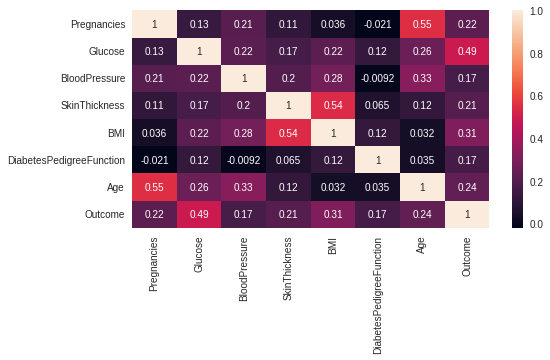

In [24]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.heatmap(diabetes_data.corr(), annot=True);

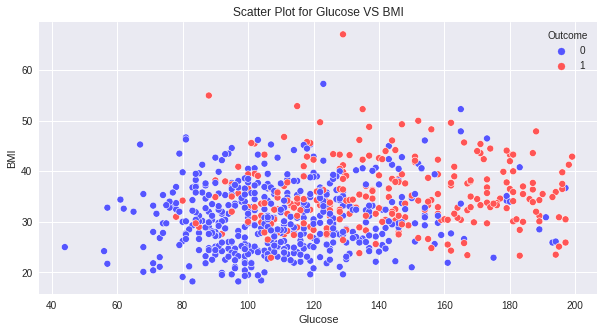

In [69]:
# Построим диаграмму рассеяния, по оси абсцисс отложим фактор Glucose, а по оси ординат — BMI.
# Сделаем цветовую группировку по признаку наличия диабета:

fig, ax = plt.subplots(figsize = (10, 5)) #фигура + координатная плоскость
#Строим диаграмму рассеяния
sns.scatterplot(
    data=diabetes_data, #датасет
    x='Glucose',        #ось абсцисс
    y='BMI',            #ось ординат
    hue='Outcome',      #группировка
    palette='seismic',  #палитра
    ax=ax,              #координатная плоскость
)

#Задаем название графику
ax.set_title('Scatter Plot for Glucose VS BMI');

In [70]:
# Построим разделяющую плоскость с помощью логистической регрессии.

#Создаем матрицу наблюдений X, состоящую из двух признаков, и столбец с правильным ответами y:
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

In [71]:
# Обучим логистическую регрессию, сделав значением параметра random_state 42

#Создаем объект класса логистическая регрессия
log_reg_2d = linear_model.LogisticRegression(random_state=42)

#Обучаем модель, минизируя logloss
# Для обучения модели необходимо просто вызвать метод fit(), передав в него матрицу наблюдений X и вектор правильных ответов y.
log_reg_2d.fit(X, y)

#Выводим результирующие коэффициенты
# Чтобы получить параметр w0, нужно обратиться к атрибуту intercept_, а вектор параметров w1, w2, ..., wm будет храниться
# в атрибуте coef_ (так как в матрице X два фактора, то и коэффициента будет два):
print('w0: {}'.format(log_reg_2d.intercept_)) #свободный член w0
print('w1, w2: {}'.format(log_reg_2d.coef_))  #остальные параметры модели w1, w2, ..., wm

w0: [-8.24898965]
w1, w2: [[0.03779275 0.0875742 ]]


In [72]:
# Мы должны подставить значения факторов в уравнение разделяющей плоскости,
# а затем результат подставить в функцию сигмоиды с помощью метода predict_proba().

# Мы хотим вычислить вероятность наличия/отсутствия диабета у пациента c концентрацией глюкозы 180 мг/100мл и индексом массы тела в 51 кг/м2:

#Значения концентации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание вероятностей:
y_new_proba_predict = log_reg_2d.predict_proba(x_new)
print('Predicted probabilities: {}'.format(np.round(y_new_proba_predict, 2)))

# Первая вероятность - вероятность принадлежности к классу 0 (диабета нет),
# а вторая — вероятность принадлежности к классу 1 (диабет есть).

Predicted probabilities: [[0.05 0.95]]


In [73]:
# Можно предсказать не вероятности, а сам класс (1 или 0) с помощью метода predict()

#Значения концентации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание класса:
y_new_predict = log_reg_2d.predict(x_new)
print('Predicted class: {}'.format(y_new_predict))

# Предсказанный класс равен 1: значит, модель считает, что данный пациент болеет диабетом.

Predicted class: [1]


In [74]:
# Функция для визуализации модели принимает три аргумента:
    # X — матрица с наблюдениями,
    # y — столбец с правильными ответами,
    # model — модель, с помощью которой делается предсказание вероятностей.

def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI - от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции - два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец - reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказывает вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаем фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость - линия, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даем графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легену в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

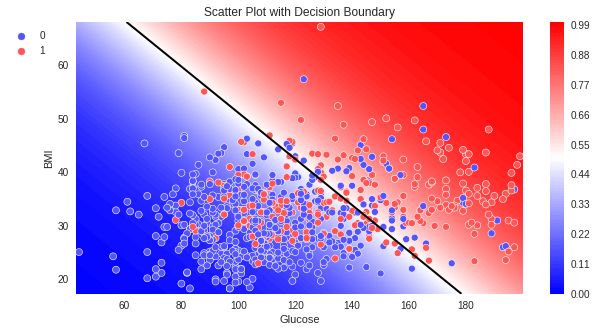

In [75]:
plot_probabilities_2d(X, y, log_reg_2d)

In [76]:
# Давайте будем использовать для построения модели всю предоставленную нам информацию 
# — все факторы из набора данных.

# Создадим матрицу наблюдений X и вектор ответов y:
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [77]:
# Обучим модель логистической регрессии с помощью метода fit().
# Сделаем предсказание вероятности заболевания диабетом для каждого пациента и самих классов с помощью метода predict().

#Создаем объект класса логистическая регрессия
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000)
#Обучаем модель, минизируя logloss
log_reg_full.fit(X, y)

#Делаем предсказание класса
y_pred = log_reg_full.predict(X)
y_prob = log_reg_full.predict_proba(X)

# Добавим предсказание в таблицу X для наглядности:
# Создадим временную таблицу X
X_temp = X.copy()

#Добавим в эту таблицу результат предсказания
X_temp['Prediction'] = y_pred
X_temp[['Probability of 0', 'Probability of 1']] = np.round(y_prob, 2)
X_temp.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Prediction,Probability of 0,Probability of 1
752,5,139.0,64.0,35.0,28.6,0.411,26,0,0.62,0.38
753,1,96.0,122.0,29.0,22.4,0.207,27,0,0.98,0.02
754,10,101.0,86.0,37.0,45.6,1.136,38,1,0.30,0.70
755,0,141.0,72.0,29.0,42.4,0.205,29,1,0.49,0.51
756,0,125.0,96.0,29.0,22.5,0.262,21,0,0.93,0.07


### Задание 2.9

Таблица состоит из трёх столбцов:

X_1 и X_2 — факторы;
y — целевой признак.
Обучите модель логистической регрессии для предсказания целевого признака y. В качестве алгоритма оптимизации используйте стохастический градиентный спуск (масштабировать данные не нужно). В качестве значения параметра random_state возьмите число 42, остальные параметры оставьте по умолчанию.

Воспользуйтесь функцией plot_probabilities_2d(), которую мы объявили ранее. Постройте визуализацию разделяющей поверхности.

Сколько объектов класса 0 будут неверно отнесены моделью к классу 1?

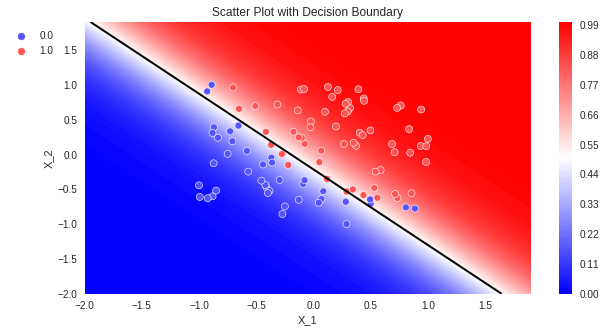

In [15]:
# log_reg_data = pd.read_csv('/home/mike/Documents/Coding/Data/task_data.csv')
# X = log_reg_data[['X_1', 'X_2']]
# y = log_reg_data['y']

# log_reg = linear_model.LogisticRegression(solver='sag', random_state=42)
# log_reg.fit(X, y)

# plot_probabilities_2d(X, y, log_reg)

## Метрики классификации

In [78]:
# Для рассчёта метрик используются функции. Первый аргумент – ȳ, а второй – y.
# Составим матрицы ошибок для моделей log_reg_2d и log_reg_full
# Сделаем предсказание наличия диабета для всех пациентов с помощью каждой из моделей:

#Делаем предсказание моделью, обученной на двух факторах 
y_pred1 = log_reg_2d.predict(diabetes_data[['Glucose', 'BMI']])
#Делаем предсказание моделью, обученной на всех факторах 
y_pred2 = log_reg_full.predict(diabetes_data.drop('Outcome', axis=1))

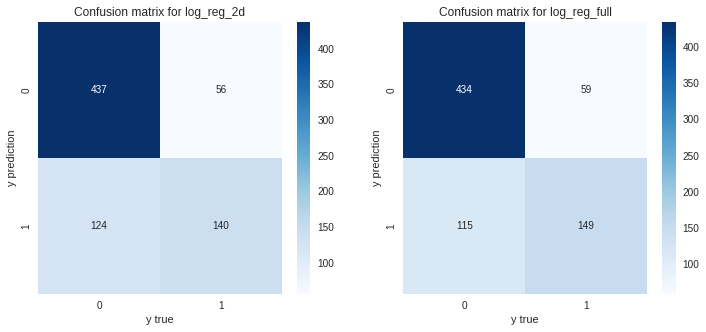

In [34]:
# Построим матрицы ошибок для каждой модели, а затем отобразим их в виде тепловых карт:

#Строим матрицы ошибок для каждой из моделей
confusion_matrix1 = metrics.confusion_matrix(y, y_pred1)
confusion_matrix2 = metrics.confusion_matrix(y, y_pred2)

#Визуализируем матрицы ошибок
fig, axes = plt.subplots(1, 2, figsize=(12, 5))     #фигура + 2 координатные плоскости

#Строим тепловую карту для первой матрицы ошибок
sns.heatmap(confusion_matrix1, annot=True, fmt='', ax=axes[0], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[0].set_title('Confusion matrix for log_reg_2d')
axes[0].set_xlabel('y true')
axes[0].set_ylabel('y prediction')

#Строим тепловую карту для второй матрицы ошибок
sns.heatmap(confusion_matrix2, annot=True, fmt='', ax=axes[1], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[1].set_title('Confusion matrix for log_reg_full')
axes[1].set_xlabel('y true')
axes[1].set_ylabel('y prediction');

На основе матрицы ошибок можно вычислить остальные метрики для каждой из моделей

In [36]:
# Расчёт метрик для модели log_reg_2d, обученной на двух факторах — Glucose и BMI:

#Модель log_reg_2d:
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y, y_pred1)))   #Рассчитываем accuracy
print('Precision: {:.2f}'.format(metrics.precision_score(y, y_pred1))) #Рассчитываем precision
print('Recall: {:.2f}'.format(metrics.recall_score(y, y_pred1)))       #Рассчитываем recall
print('F1 score: {:.2f}'.format(metrics.f1_score(y, y_pred1)))         #Рассчитываем F1-меру

Accuracy: 0.76
Precision: 0.71
Recall: 0.53
F1 score: 0.61


In [37]:
# Расчёт метрик для модели log_reg_full, обученной на всех доступных факторах:

#Модель log_reg_full:

print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y, y_pred2)))   #Рассчитываем accuracy
print('Precision: {:.2f}'.format(metrics.precision_score(y, y_pred2))) #Рассчитываем precision
print('Recall: {:.2f}'.format(metrics.recall_score(y, y_pred2)))       #Рассчитываем recall
print('F1 score: {:.2f}'.format(metrics.f1_score(y, y_pred2)))         #Рассчитываем F1-меру

Accuracy: 0.77
Precision: 0.72
Recall: 0.56
F1 score: 0.63


Для облегчения расчёта метрик можно использовать функцию classification_report() из модуля metrics. Она возвращает отчёт обо всех метриках классификации:

In [38]:
print(metrics.classification_report(y, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       493
           1       0.72      0.56      0.63       264

    accuracy                           0.77       757
   macro avg       0.75      0.72      0.73       757
weighted avg       0.76      0.77      0.76       757



In [39]:
# Сделаем предсказание вероятности наличия диабета моделью log_reg_full для каждого пациента из нашей выборки.
# Затем создадим несколько различных порогов вероятности в диапазоне от 0.1 до 1 с шагом 0.05.
# В цикле будем определять класс пациента при различных порогах вероятности. В конце рассчитаем метрики.

#Считаем вероятности наличия диабета для каждого из пациентов
#Нас интересует только вероятность класса 1 (второй столбец)
y_proba_pred = log_reg_full.predict_proba(diabetes_data.drop('Outcome', axis=1))[:, 1]
#Для удобства завернем numpy-массив в pandas Series
y_proba_pred = pd.Series(y_proba_pred)

#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []

#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)

#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #Пациентов, для которых вероятность наличия диабета > threshold относим к классу 1
    #В противном случае - к классу 0
    y_pred = y_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y, y_pred))
    precision_scores.append(metrics.precision_score(y, y_pred))
    f1_scores.append(metrics.f1_score(y, y_pred))

Теперь у нас есть три списка (recall_scores, precision_scores и f1_scores), в которых хранятся значения метрик при различных значениях порога вероятности .

Давайте построим графики зависимости метрик от порога вероятности:

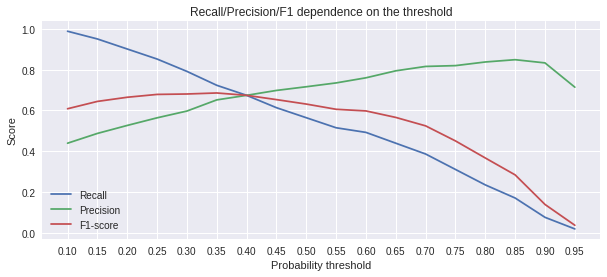

In [43]:
#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4))                  #фигура + координатная плоскость
ax.plot(thresholds, recall_scores, label='Recall')       #Строим линейный график зависимости recall от threshold
ax.plot(thresholds, precision_scores, label='Precision') #Строим линейный график зависимости precision от threshold
ax.plot(thresholds, f1_scores, label='F1-score')         #Строим линейный график зависимости F1 от threshold

#Даем графику название и подписи осям
ax.set_title('Recall/Precision/F1 dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')

#Устанавливаем отметки по оси x
ax.set_xticks(thresholds) 

#Отображаем легенду
ax.legend();

Давайте сделаем выбор в пользу равенства precision и recall, оно достигается при threshold=0.4.

Мы делаем предсказание вероятности наличия диабета для всех пациентов, а затем вручную определяем всех пациентов, у которых эта вероятность > 0.4, в класс 1, а остальных — в класс 0. Далее считаем метрики:

In [45]:
#Задаем оптимальный порог вероятностей
threshold_opt = 0.4
#Пациентов, для которых вероятность наличия диабета > 0.4 относим к классу 1
#В противном случае - к классу 0
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y, y_pred_opt))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       493
           1       0.67      0.67      0.67       264

    accuracy                           0.77       757
   macro avg       0.75      0.75      0.75       757
weighted avg       0.77      0.77      0.77       757



### Задание 3.6

У вас есть истинные ответы y_true = [0, 0, 1, 1, 1, 1, 0, 1] и предсказанные ответы y_pred = [0, 1, 0, 0, 1, 1, 0, 1].

Вычислите значение метрики precision.

In [50]:
y_true_ = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred_ = [0, 1, 0, 0, 1, 1, 0, 1]
 
print(f'{metrics.precision_score(y_true_, y_pred_):.2f}')
print(f'{metrics.recall_score(y_true_, y_pred_):.2f}')
print(f'{metrics.f1_score(y_true_, y_pred_):.2f}')


print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_true_, y_pred_)))   #Рассчитываем accuracy
print('Precision: {:.2f}'.format(metrics.precision_score(y_true_, y_pred_))) #Рассчитываем precision
print('Recall: {:.2f}'.format(metrics.recall_score(y_true_, y_pred_)))       #Рассчитываем recall
print('F1 score: {:.2f}'.format(metrics.f1_score(y_true_, y_pred_)))         #Рассчитываем F1-меру

0.75
0.60
0.67
Accuracy: 0.62
Precision: 0.75
Recall: 0.60
F1 score: 0.67


## Мультиклассовая классификация

In [90]:
penguins_data = sns.load_dataset('penguins')
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [91]:
penguins_data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [92]:
penguins_data = penguins_data.dropna()

In [93]:
X = penguins_data.drop('species', axis=1)
y = penguins_data['species']
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male


In [94]:
X_dummies = pd.get_dummies(X)
X_dummies.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,0,1,0,1


In [95]:
#Создаем объект класса логистическая регрессия 
log_reg = linear_model.LogisticRegression(
    multi_class='multinomial', #мультиклассовая классификация
    max_iter=1000, #количество итераций, выделенных на сходимость
    random_state=42 #генерация случайных чисел
)
#Обучаем модель 
log_reg.fit(X_dummies, y)
#Делаем предсказание вероятностей
y_pred_proba = np.round(log_reg.predict_proba(X_dummies), 2)
#Делаем предсказание класса
y_pred = log_reg.predict(X_dummies)

In [96]:
#Создаем DataFrame из вероятностей
y_pred_proba_df = pd.DataFrame(
    y_pred_proba, 
    columns=['Adelie', 'Chinstrap', 'Gentoo']
)
#Создаем DataFrame из предсказанных классов
y_pred_df = pd.DataFrame(
    y_pred, 
    columns=['Predicted Class']
)
#Объединяем таблицы по вертикальной оси
y_df = pd.concat([y_pred_proba_df, y_pred_df], axis=1)
#Выбираем 5 случайных строк
y_df.sample(5, random_state=2)

,Adelie,Chinstrap,Gentoo,Predicted Class
277,0.00,0.00,1.0,Gentoo
223,0.00,0.00,1.0,Gentoo
7,0.79,0.21,0.0,Adelie
160,0.00,1.00,0.0,Chinstrap
65,1.00,0.00,0.0,Adelie


In [97]:
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       146
   Chinstrap       1.00      1.00      1.00        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



# Практика (Задания)

In [98]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn.model_selection import train_test_split #разделение выборки
from sklearn import preprocessing #предобработка
%matplotlib inline
plt.style.use('seaborn')

In [99]:
churn_data = pd.read_csv('/home/mike/Documents/Coding/Data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Напомним значения столбцов:

- RowNumber — номер строки таблицы;
- CustomerId — идентификатор клиента;
- Surname — фамилия клиента;
- CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);
- Geography — страна проживания клиента (банк межнациональный);
- Gender — пол клиента;
- Age — возраст клиента;
- Tenure — сколько лет клиент пользуется банком;
- Balance — сколько у клиента денег на счетах в банке;
- NumOfProduct — число услуг банка, которые приобрёл клиент;
- HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет);
- IsActiveMember — есть ли у клиента статус активного участника банка (1 — да, 0 — нет);
- EstimatedSalary — предполагаемая заработная плата клиента;
- Exited — статус ушедшего (1 — ушедший клиент, 0 — лояльный клиент).

In [100]:
# Мы будем прогнозировать отток в немецком филиале банка. Давайте выделим только данные, относящиеся к Германии:

churn_data = churn_data[churn_data['Geography'] == 'Germany']
churn_data.shape

(2509, 14)

In [101]:
# Сразу избавимся от заведомо неинформативных признаков: страна, номер строки, идентификатор пользователя и имя клиента.

churn_data = churn_data.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


In [102]:
# Проверим, что в наших данных нет пропусков:

churn_data.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [104]:
# Расширим наш датасет с помощью методов Feature Engineering. Создадим следующие признаки:

# - BalanceSalaryRatio — отношение баланса на счетах к заработной плате клиента;
# - TenureByAge — отношение времени пользования банком к возрасту клиента;
# - CreditScoreGivenAge — отношение кредитного рейтинга к возрасту клиента.

churn_data['BalanceSalaryRatio'] = churn_data['Balance']/churn_data['EstimatedSalary']
churn_data['TenureByAge'] = churn_data['Tenure']/(churn_data['Age'])
churn_data['CreditScoreGivenAge'] = churn_data['CreditScore']/churn_data['Age']

In [105]:
# Перекодируем единственный текстовый категориальный признак Gender в бинарный столбец (1 — 'Male', 0 — 'Female'):

churn_data['Gender'] = churn_data['Gender'].apply(lambda x: 1 if x=='Male' else 0)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517
15,616,1,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889
16,653,1,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621
26,756,1,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000
28,574,0,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837


In [106]:
# Разделим набор данных на матрицу наблюдений X и столбец ответов y:

X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]

In [107]:
# Проведём нормализацию матрицы наблюдений X:

scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [108]:
# посмотрим на сбалансированность данных.
# Для этого воспользуемся методом value_counts()
# и выведем количество наблюдений каждого из классов в долевом соотношении от общего количества наблюдений:

y.value_counts(normalize=True)

0    0.675568
1    0.324432
Name: Exited, dtype: float64

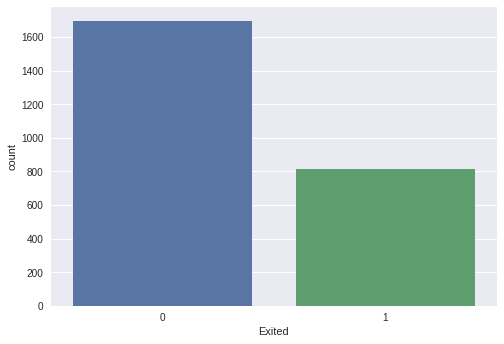

In [109]:
# Другой способ оценки сбалансированности

sns.countplot(data=churn_data, x=y);

In [110]:
# Выполним разбиение, установив stratify на Yes (y), чтобы в тренировочной и тестовой выборках параметры совпадали
# значением параметра random_state число 0

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=0)

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 12)
Test shape: (628, 12)


In [111]:
# Проверим, что число лояльных и ушедших клиентов примерно одинаково в каждой из выборок:

print('Train :', y_train.value_counts(normalize=True))
print('\n')
print('Test :', y_test.value_counts(normalize=True))

Train : 0    0.675704
1    0.324296
Name: Exited, dtype: float64


Test : 0    0.675159
1    0.324841
Name: Exited, dtype: float64


### Задание 4.2

Обучите модель логистической регрессии на тренировочных данных. Используйте в качестве алгоритма минимизации функции потерь (параметр solver) стохастический градиентный спуск. В качестве значения параметра random_state возьмите 42 для воспроизводимости результатов. Остальные параметры оставьте по умолчанию.

Предскажите метки классов для тренировочной и тестовой выборок.

Чему равно значение целевой метрики на тренировочной и тестовой выборках? Ответ приведите с точностью до двух знаков после точки-разделителя.

In [113]:
log_reg = linear_model.LogisticRegression(solver='sag', random_state=42)
log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
print('Train F1: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = log_reg.predict(X_test)
print('Test F1: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train F1: 0.49
Test F1: 0.47


### Задание 4.3

Сгенерируйте полиномиальные признаки степени 3 для тренировочной и тестовой выборок. Используйте класс PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Чему равно количество признаков в тренировочной выборке?

In [115]:
poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)

poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train_poly.shape)

(1881, 454)


### Задание 4.4

Обучите модель логистической регрессии на полиномиальных признаках.

Используйте в качестве алгоритма минимизации функции потерь (параметр solver) стохастический градиентный спуск. Параметру random_state выставите значение 42 для воспроизводимости результатов. Увеличьте максимальное количество итераций, выделяемых на сходимость (параметр max_iter), до 1000.

Остальные параметры оставьте по умолчанию.

Предскажите метки классов для тренировочной и тестовой выборок.

Чему равно значение целевой метрики на тренировочной и тестовой выборках для модели, обученной на полиномиальных признаках? 

In [116]:
log_reg_poly = linear_model.LogisticRegression(solver='sag', max_iter=1000, random_state=42)

log_reg_poly.fit(X_train_poly, y_train)

y_train_pred_poly = log_reg_poly.predict(X_train_poly)
print('Train F1: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred_poly)))

y_test_pred_poly = log_reg_poly.predict(X_test_poly)
print('Test F1: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred_poly)))

Train F1: 0.66
Test F1: 0.64


### Задание 4.5

Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. Используйте логистическую регрессию, обученную на полиномиальных признаках из предыдущего задания.

В качестве порога вероятности используйте значения из следующего диапазона:

thresholds = np.arange(0.1, 1, 0.05)

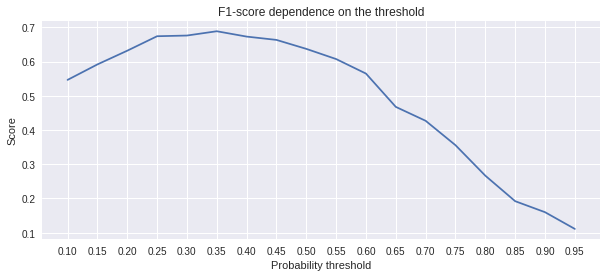

In [118]:
y_test_proba_pred = pd.Series(log_reg_poly.predict_proba(X_test_poly)[:, 1])
f1_scores = []
thresholds = np.arange(0.1, 1, 0.05)
for threshold in thresholds:
    y_test_pred_poly = y_test_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    f1_scores.append(metrics.f1_score(y_test, y_test_pred_poly))
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(thresholds, f1_scores, label='F1')
ax.set_title('F1-score dependence on the threshold')
ax.set_xticks(thresholds) 
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score');

### Задание 4.6

Сделайте предсказание классов с подобранным оптимальным порогом вероятности. Чему равно значение целевой метрики на тестовой выборке? 

In [119]:
threshold_opt = 0.35
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
print('Test F1: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred_opt)))

Test F1: 0.69


# ДЕРЕВЬЯ РЕШЕНИЙ В SKLEARN

In [123]:
from sklearn import tree #модели деревьев решения

In [120]:
diabetes_data = pd.read_csv('/home/mike/Documents/Coding/Data/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


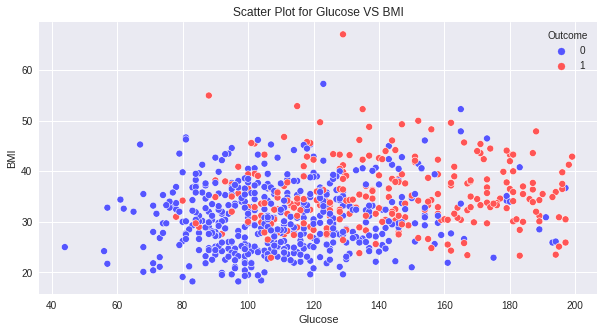

In [121]:
# диаграмма рассеяния, разделённая по цвету целевой переменной, признаком наличия диабета (по Glucose и BMI)

fig, ax = plt.subplots(figsize = (10, 5)) #фигура + координатная плоскость
#Строим диаграмму рассеяния
sns.scatterplot(
    data=diabetes_data, #датасет
    x='Glucose', #ось абсцисс
    y='BMI', #ось ординат
    hue='Outcome', #группировка
    palette='seismic', #палитра
    ax=ax, #координатная плоскость
);
#Задаём название графика
ax.set_title('Scatter Plot for Glucose VS BMI');

In [122]:
# Создадим матрицу наблюдений X из признаков Glucose и BMI и столбец с правильными ответами y из признака Outcome:

#Создаём матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

In [124]:
# обучим дерево решений с критерием информативности criterion='entropy' (энтропия Шеннона), максимальной глубиной max_depth=3 и параметром random_state=42.

#Создаём объект класса DecisionTreeClassifier
dt_clf_2d = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности 
    max_depth=3, #максимальная глубина
    random_state=42 #генератор случайных чисел
)
#Обучаем дерево решений по алгоритму CART
dt_clf_2d.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

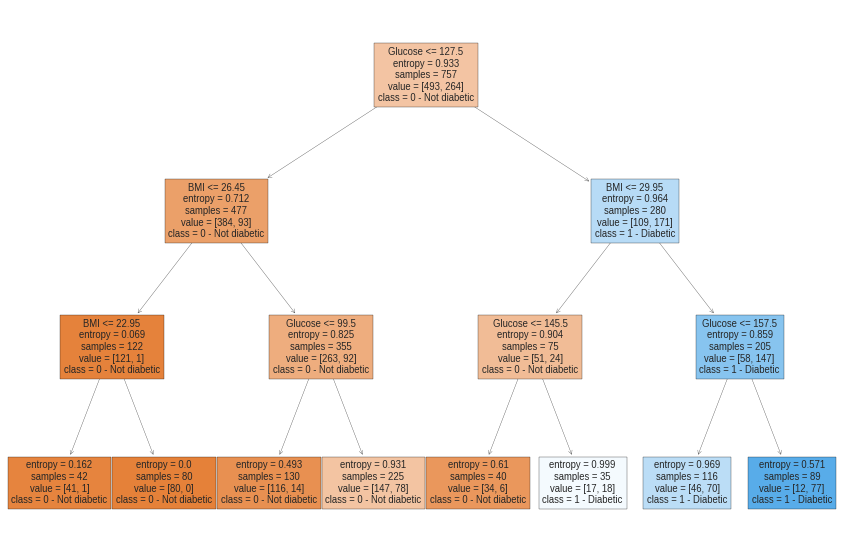

In [125]:
# Итак, мы обучили дерево решений. Обученное дерево можно визуализировать в виде графа, 
# чтобы посмотреть, как дерево делает предсказание. 
# Для этого есть функция plot_tree() из модуля tree.

#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))
#Строим граф дерева решений
tree.plot_tree(
    dt_clf_2d, #объект обученного дерева
    feature_names=X.columns, #наименования факторов
    class_names=["0 - Not diabetic", "1 - Diabetic"], #имена классов
    filled=True, #расцветка графа
);

In [126]:
#Значения концентрации глюкозы и индекса массы тела для одного отдельного пациента
x_new = [[180, 51]]
#Делаем предсказание класса:
y_new_predict = dt_clf_2d.predict(x_new)
print('Predicted class: {}'.format(y_new_predict))

Predicted class: [1]


In [127]:
#Значения концентрации глюкозы и индекса массы тела для одного отдельного пациента
x_new = [[180, 51]]
#Делаем предсказание вероятностей:
y_new_proba_predict = dt_clf_2d.predict_proba(x_new)
print('Predicted probabilities: {}'.format(np.round(y_new_proba_predict, 3)))

# Predicted probabilities: [[0.135 0.865]]

Predicted probabilities: [[0.135 0.865]]


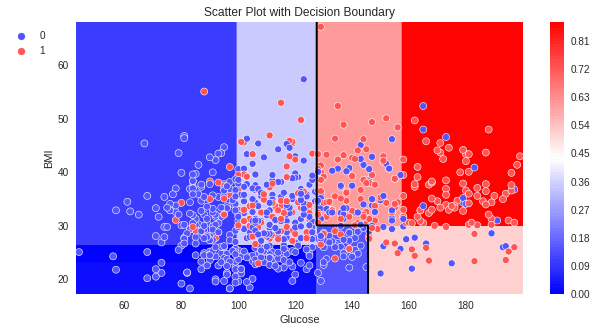

In [128]:
# Давайте посмотрим, как будет выглядеть разделяющая поверхность дерева решений для двух признаков. 
# Для этого воспользуемся функцией plot_probabilities_2d() - см. выше

plot_probabilities_2d(X, y, dt_clf_2d)


In [129]:
# Можно рассчитать полученные метрики качества. 
# Для этого предскажем наличие диабета для всех пациентов из матрицы наблюдений X, 
# а затем рассчитаем метрики классификации с помощью функции classification_report()

#Делаем предсказание класса для всего набора данных
y_pred = dt_clf_2d.predict(X)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       493
           1       0.69      0.62      0.65       264

    accuracy                           0.77       757
   macro avg       0.75      0.74      0.74       757
weighted avg       0.77      0.77      0.77       757



In [130]:
# построим дерево решений без ограничения его максимальной глубины.
# Для этого нам просто не нужно задавать параметр max_depth:

#Создаём объект класса DecisionTreeClassifier
dt_clf_bad = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=42 #генератор случайных чисел
)
#Обучаем дерево решений по алгоритму CART без ограничения его длины
dt_clf_bad.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [131]:
#Делаем предсказание класса для всего набора данных
y_pred = dt_clf_bad.predict(X)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       493
           1       1.00      0.97      0.98       264

    accuracy                           0.99       757
   macro avg       0.99      0.98      0.99       757
weighted avg       0.99      0.99      0.99       757



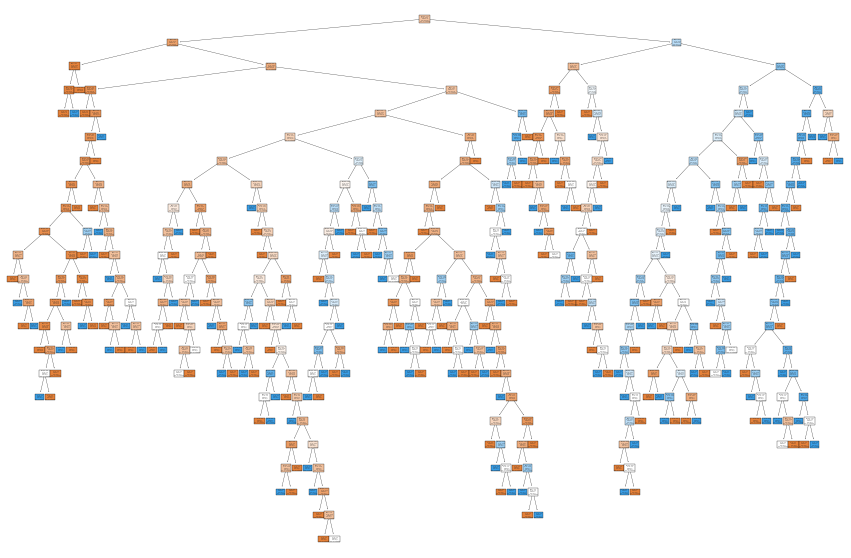

In [132]:
#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))
#Строим граф 
tree_graph = tree.plot_tree(
    dt_clf_bad,                                        #объект обученного дерева
    feature_names=X.columns,                           #наименования факторов
    class_names=["0 - Not diabetic", "1 - Diabetic"],  #имена классов
    filled=True,                                       #расцветка графа
);

In [133]:
# Посмотреть получившуюся глубину дерева можно с помощью метода get_depth():

dt_clf_bad.get_depth()

22

In [134]:
# Давайте попробуем обучить дерево решений на всех признаках.

#Создаём матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [135]:
# Будем использовать дерево решений с максимальной глубиной 6 
# (мы подобрали её заранее, при такой максимальной глубине наблюдается наименьшее переобучение).

#Обучим модель на всех признаках с помощью метода fit(), 
# затем сделаем предсказание с помощью метода predict() 
# и выведем отчёт о метриках классификации с помощью функции classification_report():

#Создаём объект класса DecisionTreeClassifier
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=6, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
#Обучаем модель по алгоритму CART
dt_clf_full.fit(X, y)
 
#Делаем предсказание класса
y_pred = dt_clf_full.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       493
           1       0.84      0.69      0.76       264

    accuracy                           0.85       757
   macro avg       0.84      0.81      0.82       757
weighted avg       0.84      0.85      0.84       757



In [136]:
# Посмотрим важность признаков, обратившись к атрибуту feature_importance_:
print(dt_clf_full.feature_importances_)

[0.02675774 0.36675873 0.03368236 0.04553664 0.24588118 0.14137465
 0.14000868]


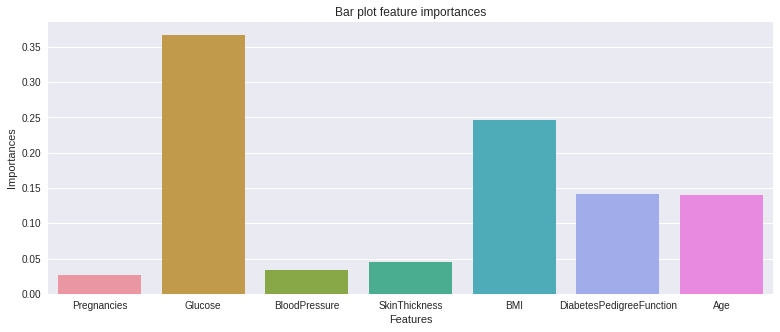

In [137]:
# Значения, которые будут выведены в качестве элементов массива,
# и есть коэффициенты важности каждого из признаков.
# Для удобства обычно строят столбчатую диаграмму:

fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X.columns #признаки
feature_importances = dt_clf_full.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax);
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

In [142]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_full_gini = tree.DecisionTreeClassifier(
    criterion='gini', #критерий информативности
    max_depth=6, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
#Обучаем модель по алгоритму CART
dt_clf_full_gini.fit(X, y)
 
#Делаем предсказание класса
y_pred = dt_clf_full_gini.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       493
           1       0.85      0.73      0.78       264

    accuracy                           0.86       757
   macro avg       0.85      0.83      0.84       757
weighted avg       0.86      0.86      0.86       757



In [146]:
# print('F1 score: {:.2f}'.format(metrics.classification_report(y, y_pred)))         #Рассчитываем F1-меру
print(round(metrics.f1_score(y, y_pred), 2))

0.78
